## Name: Danish Zaheer
## Roll no: 25280092

In [1]:
# impoting libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

### **Visualizations for Pytrends**

In [2]:
# project root detection
project_root = Path.cwd().resolve()
while project_root != project_root.parent:
    if (project_root / "data").exists() and (project_root / "visualizations").exists():
        break
    project_root = project_root.parent
else:
    raise FileNotFoundError(f"Could not find project root from cwd={Path.cwd().resolve()}")

csv_path = project_root / "data" / "cleaned" / "pytrends_2020_2025_cleaned.csv"
df_pytrends = pd.read_csv(csv_path)
print("Shape:", df_pytrends.shape)
df_pytrends.head()

Shape: (72, 5)


,date,cybersecurity,SQL injection,ransomware,phishing
0,2020-01-01,43.25,12.75,28.50,68.75
1,2020-02-01,45.25,13.75,29.25,68.75
2,2020-03-01,37.40,12.00,25.60,72.00
3,2020-04-01,38.00,13.25,36.75,87.25
4,2020-05-01,38.80,12.60,27.20,77.20


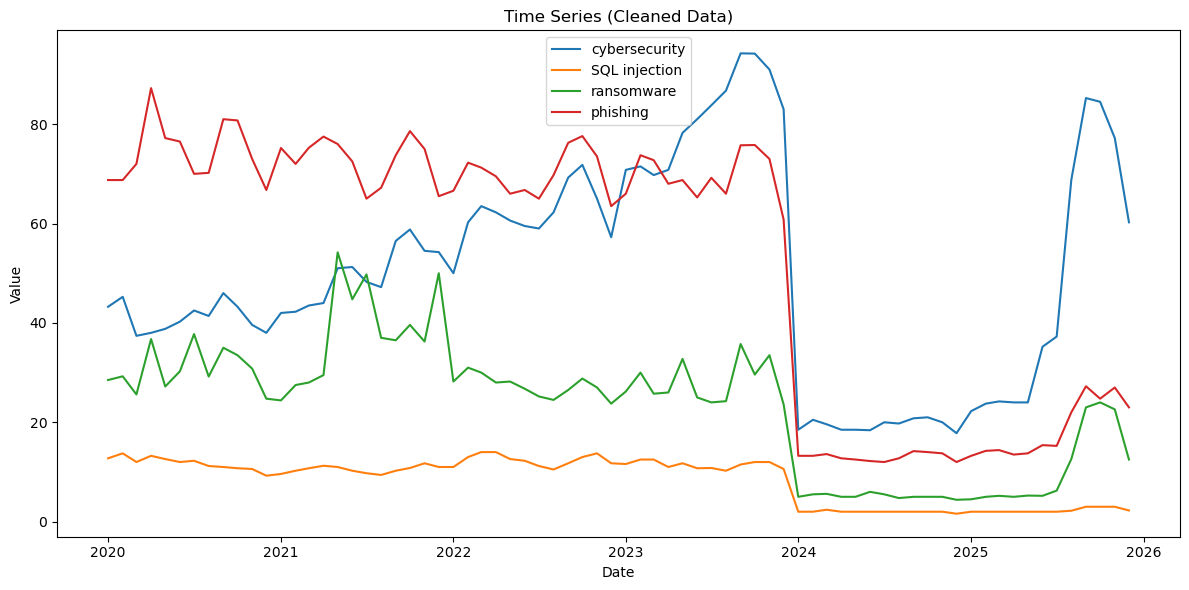

In [3]:
# showing the data over time by sorting over the years
df_pytrends["date"] = pd.to_datetime(df_pytrends["date"], errors="coerce")
df_pytrends = df_pytrends.dropna(subset=["date"])
df_pytrends = df_pytrends.sort_values("date")
# plotting the time series by dropping the date column
# select columns for plotting 
value_cols = []
for col in df_pytrends.columns:
    if col != "date":
        value_cols.append(col)
plt.figure(figsize=(12, 6))
for col in value_cols:
    y_values = pd.to_numeric(df_pytrends[col], errors="coerce")
    plt.plot(df_pytrends["date"], y_values, label=col)
# plot code
plt.title("Time Series (Cleaned Data)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

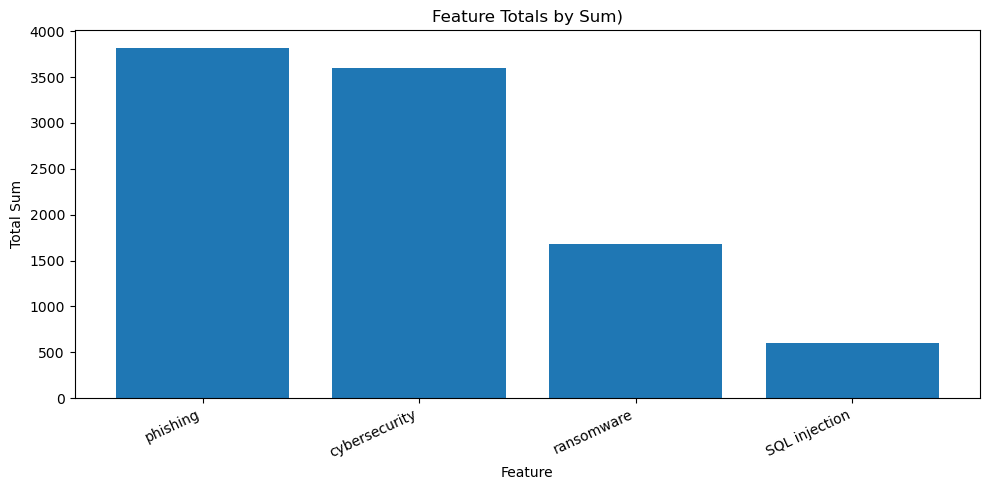

In [4]:
# working copy
df_pytrends_1 = df_pytrends.copy()
# feature names
features = ["cybersecurity", "SQL injection", "ransomware", "phishing"]
# convert features to numeric
df_pytrends_1[features] = df_pytrends_1[features].apply(pd.to_numeric, errors="coerce")
# totals per feature
totals = df_pytrends_1[features].sum().sort_values(ascending=False)
# bar chart
plt.figure(figsize=(10, 5))
plt.bar(totals.index, totals.values)
plt.title("Feature Totals by Sum)")
plt.xlabel("Feature")
plt.ylabel("Total Sum")
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()

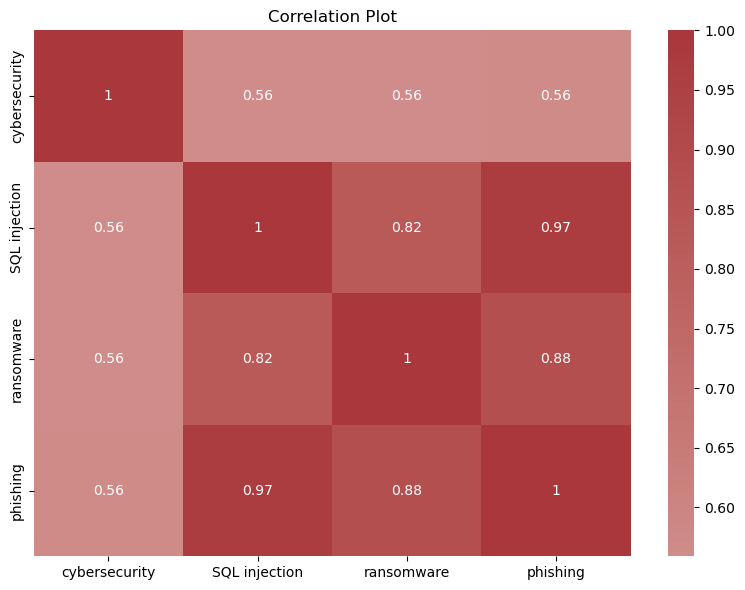

In [5]:
corr = df_pytrends.drop(columns=["date"], errors="ignore").corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="vlag", center=0)
plt.title("Correlation Plot")
plt.tight_layout()
plt.show()

### **Visualizations for All Cyber Attacks file**

In [6]:
# project root detection
project_root = Path.cwd().resolve()
while project_root != project_root.parent:
    if (project_root / "data").exists() and (project_root / "visualizations").exists():
        break
    project_root = project_root.parent
else:
    raise FileNotFoundError(f"Could not find project root from cwd={Path.cwd().resolve()}")

csv_path = project_root / "data" / "cleaned" / "allcyberattacks_cleaned.csv"
df_cyberattack = pd.read_csv(csv_path)
print("Shape:", df_cyberattack.shape)
df_cyberattack.head()

Shape: (3184, 11)


,claim_gang,claim_url,country,date,domain,has_infostealer_info,link,summary,title,url,victim
0,unknown,unknown,US,2022-02-28,kannapolisnc.gov,False,https://www.ransomware.live/id/a2FubmFwb2xpc25...,"La ville de Kannapolis, en Caroline du Nord, a...",9 Investigates: Kannapolis didn’t alert public...,https://www.wsoctv.com/news/local/9-investigat...,Kannapolis
1,unknown,unknown,JP,2022-07-15,tokyo-mou.org,False,https://www.ransomware.live/id/dG9reW8tbW91Lm9...,L'autorité de contrôle des ports de Tokyo MOU ...,Tokyo MOU reveals cyber-attack compromised dat...,https://www.tradewindsnews.com/regulation/toky...,Tokyo MOU Port State Control authority
2,unknown,unknown,FR,2022-09-12,toulouse-inp.fr,False,https://www.ransomware.live/id/dG91bG91c2UtaW5...,"En septembre 2022, Toulouse INP a été victime ...","Ransomware : en septembre 2022, Toulouse INP a...",https://www.lemagit.fr/actualites/252524874/Cy...,Toulouse INP
3,unknown,unknown,US,2022-10-25,sandi.net,False,https://www.ransomware.live/id/c2FuZGkubmV0QDI...,Des données médicales d'étudiants de San Diego...,San Diego Unified student medical data comprom...,https://www.sandiegouniontribune.com/news/educ...,San Diego Unified School District
4,unknown,unknown,GB,2022-11-10,londonandzurich.co.uk,False,https://www.ransomware.live/id/bG9uZG9uYW5kenV...,La société de prélèvement direct London & Zuri...,London & Zurich ransomware attack causes custo...,https://www.theregister.com/2023/11/23/ransomw...,London & Zurich


In [7]:
# cleaning date column
df_cyberattack["date"] = pd.to_datetime(df_cyberattack["date"], errors="coerce")
df_cyberattack = df_cyberattack.dropna(subset=["date"]).reset_index(drop=True)
# checking data
print("Shape:", df_cyberattack.shape)
df_cyberattack.head()

Shape: (3184, 11)


,claim_gang,claim_url,country,date,domain,has_infostealer_info,link,summary,title,url,victim
0,unknown,unknown,US,2022-02-28,kannapolisnc.gov,False,https://www.ransomware.live/id/a2FubmFwb2xpc25...,"La ville de Kannapolis, en Caroline du Nord, a...",9 Investigates: Kannapolis didn’t alert public...,https://www.wsoctv.com/news/local/9-investigat...,Kannapolis
1,unknown,unknown,JP,2022-07-15,tokyo-mou.org,False,https://www.ransomware.live/id/dG9reW8tbW91Lm9...,L'autorité de contrôle des ports de Tokyo MOU ...,Tokyo MOU reveals cyber-attack compromised dat...,https://www.tradewindsnews.com/regulation/toky...,Tokyo MOU Port State Control authority
2,unknown,unknown,FR,2022-09-12,toulouse-inp.fr,False,https://www.ransomware.live/id/dG91bG91c2UtaW5...,"En septembre 2022, Toulouse INP a été victime ...","Ransomware : en septembre 2022, Toulouse INP a...",https://www.lemagit.fr/actualites/252524874/Cy...,Toulouse INP
3,unknown,unknown,US,2022-10-25,sandi.net,False,https://www.ransomware.live/id/c2FuZGkubmV0QDI...,Des données médicales d'étudiants de San Diego...,San Diego Unified student medical data comprom...,https://www.sandiegouniontribune.com/news/educ...,San Diego Unified School District
4,unknown,unknown,GB,2022-11-10,londonandzurich.co.uk,False,https://www.ransomware.live/id/bG9uZG9uYW5kenV...,La société de prélèvement direct London & Zuri...,London & Zurich ransomware attack causes custo...,https://www.theregister.com/2023/11/23/ransomw...,London & Zurich


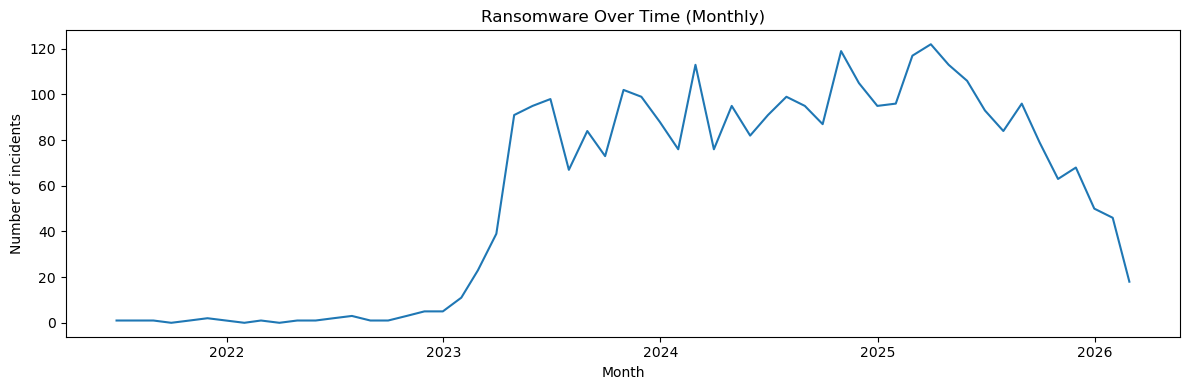

In [8]:
# count how many rows (incidents) happen in each month
monthly_counts = (
    df_cyberattack
    .set_index("date")
    .resample("ME")   # "M" = month-end frequency
    .size()
)
# line plot
plt.figure(figsize=(12, 4))
plt.plot(monthly_counts.index, monthly_counts.values)
plt.title("Ransomware Over Time (Monthly)")
plt.xlabel("Month")
plt.ylabel("Number of incidents")
plt.tight_layout()
plt.show()

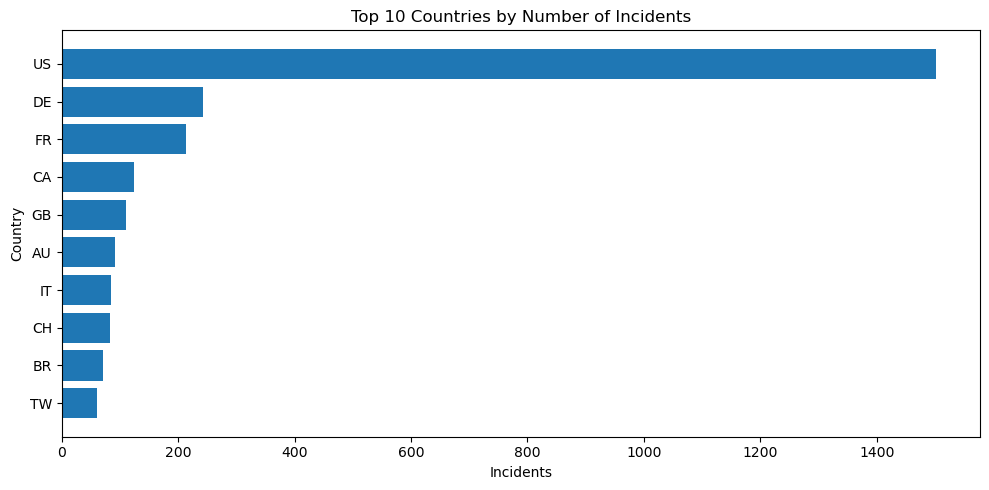

In [9]:
# Top countries by number of incidents
country_col = "country"
# clean country names + remove unknown values
country_series = df_cyberattack[country_col].astype(str).str.strip()
bad_labels = ["unknown", "nan", "none", ""]
country_series = country_series[~country_series.str.lower().isin(bad_labels)]
# top 10 countries (sorted for horizontal bar chart)
top_countries = country_series.value_counts().head(10)
top_countries = top_countries.sort_values()
# bar chart
plt.figure(figsize=(10, 5))
plt.barh(top_countries.index, top_countries.values)
plt.title("Top 10 Countries by Number of Incidents")
plt.xlabel("Incidents")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

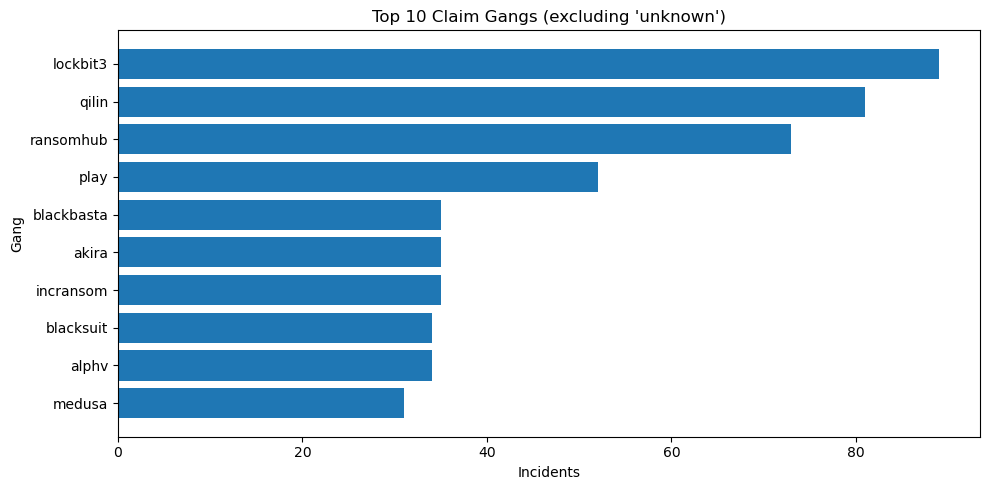

In [10]:
# top claim gangs by number of incidents
gang_col = "claim_gang"
gang_series = df_cyberattack[gang_col].astype(str).str.strip()
# exclude unknown-ish values
bad_labels = ["unknown", "nan", "none", "false", "true", ""]
gang_series = gang_series[~gang_series.str.lower().isin(bad_labels)]
# top 10 gangs (sorted for horizontal bar chart)
top_gangs = gang_series.value_counts().head(10)
top_gangs = top_gangs.sort_values()
# bar chart
plt.figure(figsize=(10, 5))
plt.barh(top_gangs.index, top_gangs.values)
plt.title("Top 10 Claim Gangs (excluding 'unknown')")
plt.xlabel("Incidents")
plt.ylabel("Gang")
plt.tight_layout()
plt.show()

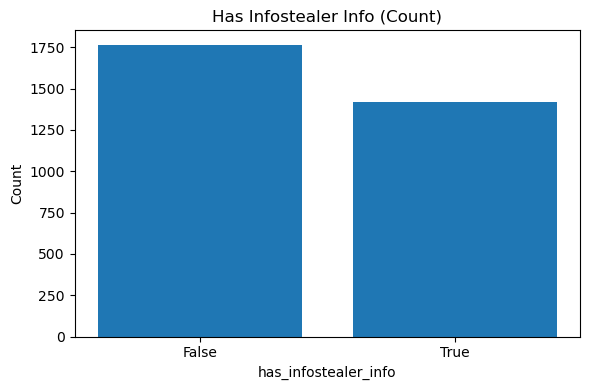

In [11]:
# Distribution of has_infostealer_info (count + percentage)
col = "has_infostealer_info"
s = df_cyberattack[col].astype(str).str.strip()
# count + percent
counts = s.value_counts(dropna=False)
percent = (counts / counts.sum()) * 100
summary = pd.DataFrame({"count": counts, "percent": percent.round(2)})
# bar chart
plt.figure(figsize=(6, 4))
plt.bar(summary.index.astype(str), summary["count"].values)
plt.title("Has Infostealer Info (Count)")
plt.xlabel(col)
plt.ylabel("Count")
plt.tight_layout()
plt.show()


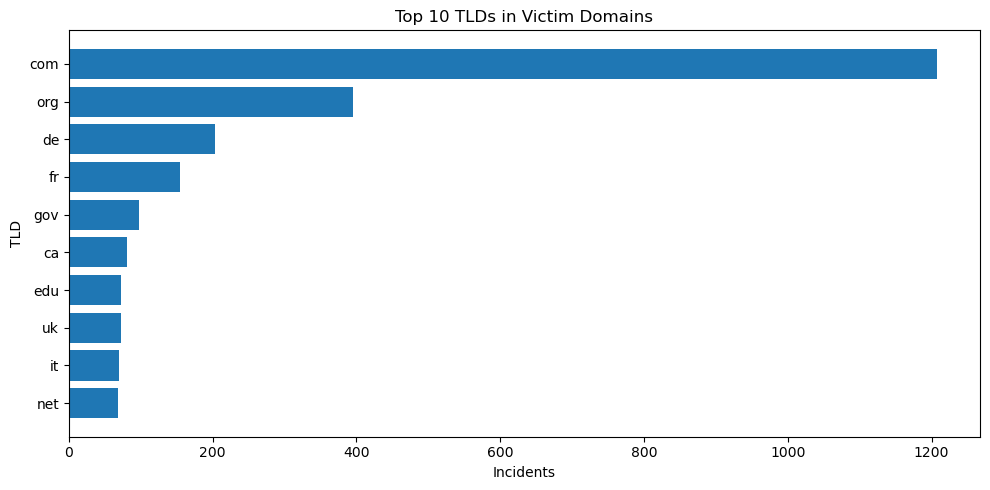

In [12]:
# Top 10 TLDs from domain
tld = (
    df_cyberattack["domain"]
    .astype(str).str.strip().str.lower()
    .str.replace(r"^https?://", "", regex=True)
    .str.split("/").str[0]
    .str.split(":").str[0]
    .str.split(".").str[-1]
)
# remove junk
bad_labels = ["nan", "none", "", "unknown"]
tld = tld[~tld.isin(bad_labels)]
# top 10 tlds (sorted for horizontal bar chart)
top_tlds = tld.value_counts().head(10)
top_tlds = top_tlds.sort_values()
# bar chart
plt.figure(figsize=(10, 5))
plt.barh(top_tlds.index, top_tlds.values)
plt.title("Top 10 TLDs in Victim Domains")
plt.xlabel("Incidents")
plt.ylabel("TLD")
plt.tight_layout()
plt.show()

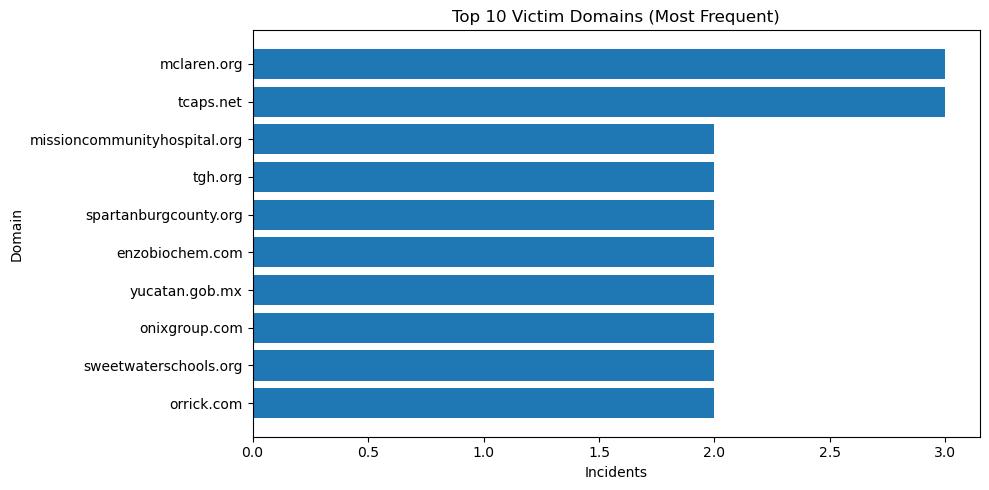

In [13]:
# Top 10 victim domains
domain_series = (
    df_cyberattack["domain"]
    .astype(str).str.strip().str.lower()
    .str.replace(r"^https?://", "", regex=True)
    .str.split("/").str[0]
    .str.split(":").str[0]
)
# remove junk/unknown
bad_labels = ["nan", "none", "", "unknown", "false"]
domain_series = domain_series[~domain_series.isin(bad_labels)]
# top 10 domains (sorted for horizontal bar chart)
top_domains = domain_series.value_counts().head(10)
top_domains = top_domains.sort_values()
# bar chart
plt.figure(figsize=(10, 5))
plt.barh(top_domains.index, top_domains.values)
plt.title("Top 10 Victim Domains (Most Frequent)")
plt.xlabel("Incidents")
plt.ylabel("Domain")
plt.tight_layout()
plt.show()


### **Visualizations for Extracted unstructred data**

In [14]:
project_root = Path.cwd().resolve()
while project_root != project_root.parent:
    if (project_root / "data").exists() and (project_root / "visualizations").exists():
        break
    project_root = project_root.parent
else:
    raise FileNotFoundError(f"Could not find project root from cwd={Path.cwd().resolve()}")

csv_path = project_root / "data" / "cleaned" / "Extracted_from_ACTP_cleaned.csv"
df_extr_str_to_un = pd.read_csv(csv_path)
print("Shape:", df_extr_str_to_un.shape)
df_extr_str_to_un.head(4)

Shape: (2626, 2)


,Word-sentence,count
0,Data Breach Notification,411
1,Today's Information,57
2,none,27
3,Data Breach Notifications,21


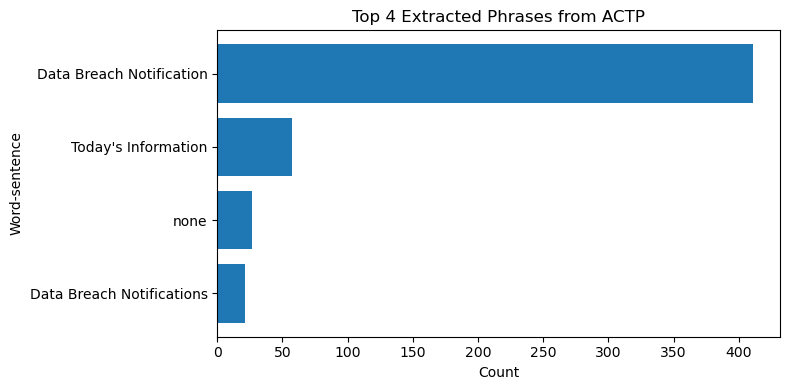

In [15]:
df_extr_str_to_un["count"] = pd.to_numeric(df_extr_str_to_un["count"], errors="coerce")
top_4 = (
    df_extr_str_to_un.dropna(subset=["count"])
      .sort_values("count", ascending=False)
      .head(4)
      .sort_values("count", ascending=True)
)

plt.figure(figsize=(8, 4))
plt.barh(top_4["Word-sentence"], top_4["count"])
plt.xlabel("Count")
plt.ylabel("Word-sentence")
plt.title("Top 4 Extracted Phrases from ACTP")
plt.tight_layout()
plt.show()

### **Visualizations for Kaggle Dataset**

In [16]:
project_root = Path.cwd().resolve()
while project_root != project_root.parent:
    if (project_root / "data").exists() and (project_root / "visualizations").exists():
        break
    project_root = project_root.parent
else:
    raise FileNotFoundError(f"Could not find project root from cwd={Path.cwd().resolve()}")

csv_path = project_root / "data" / "cleaned" / "Global_Cybersecurity_Threats_2015-2024_cleaned.csv"
df_kaggle_data = pd.read_csv(csv_path)
df_kaggle_data.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,1.043437,0.926143,Hacker Group,Unpatched Software,VPN,1.289617
1,China,2019,Ransomware,Retail,0.406336,-0.719994,Hacker Group,Unpatched Software,Firewall,1.678584
2,India,2017,Man-in-the-Middle,IT,-0.411405,0.349128,Hacker Group,Weak Passwords,VPN,-0.801076
3,UK,2024,Ransomware,Telecommunications,-0.314485,0.533419,Nation-state,Social Engineering,AI-based Detection,-1.433146
4,Germany,2018,Man-in-the-Middle,IT,0.830839,1.055544,Insider,Social Engineering,VPN,1.532721


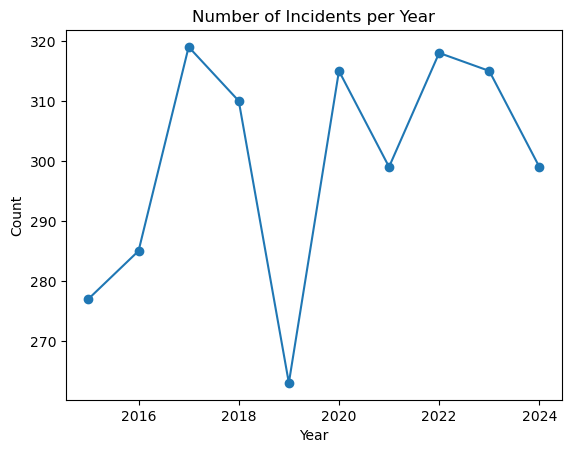

In [17]:
# number of incidents per year
incidents_by_year = df_kaggle_data.groupby("Year").size()
incidents_by_year = incidents_by_year.sort_index()
plt.figure()
plt.plot(incidents_by_year.index, incidents_by_year.values, marker="o")
plt.title("Number of Incidents per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

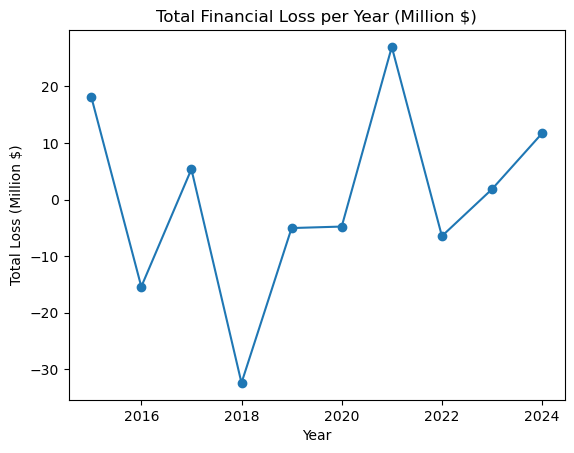

In [18]:
# line chart: total financial loss per year
loss_by_year = df_kaggle_data.groupby("Year")["Financial Loss (in Million $)"].sum()
loss_by_year = loss_by_year.sort_index()
plt.figure()
plt.plot(loss_by_year.index, loss_by_year.values, marker="o")
plt.title("Total Financial Loss per Year (Million $)")
plt.xlabel("Year")
plt.ylabel("Total Loss (Million $)")
plt.show()

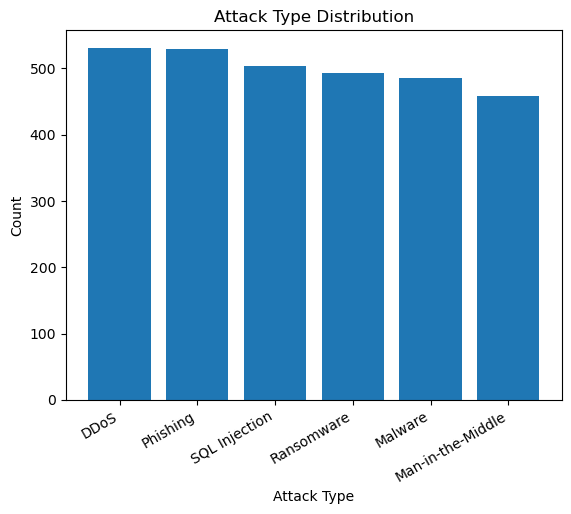

In [19]:
# bar chart: attack type counts
attack_counts = df_kaggle_data["Attack Type"].value_counts()
plt.figure()
plt.bar(attack_counts.index, attack_counts.values)
plt.title("Attack Type Distribution")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.xticks(rotation=30, ha="right")
plt.show()

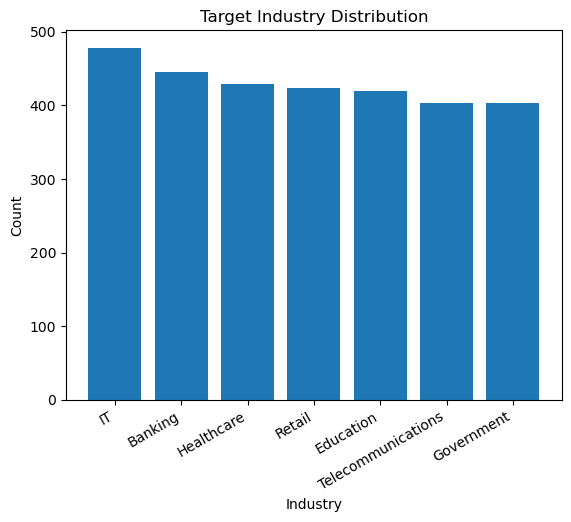

In [20]:
# bar chart: target industry counts
industry_counts = df_kaggle_data["Target Industry"].value_counts()
plt.figure()
plt.bar(industry_counts.index, industry_counts.values)
plt.title("Target Industry Distribution")
plt.xlabel("Industry")
plt.ylabel("Count")
plt.xticks(rotation=30, ha="right")
plt.show()

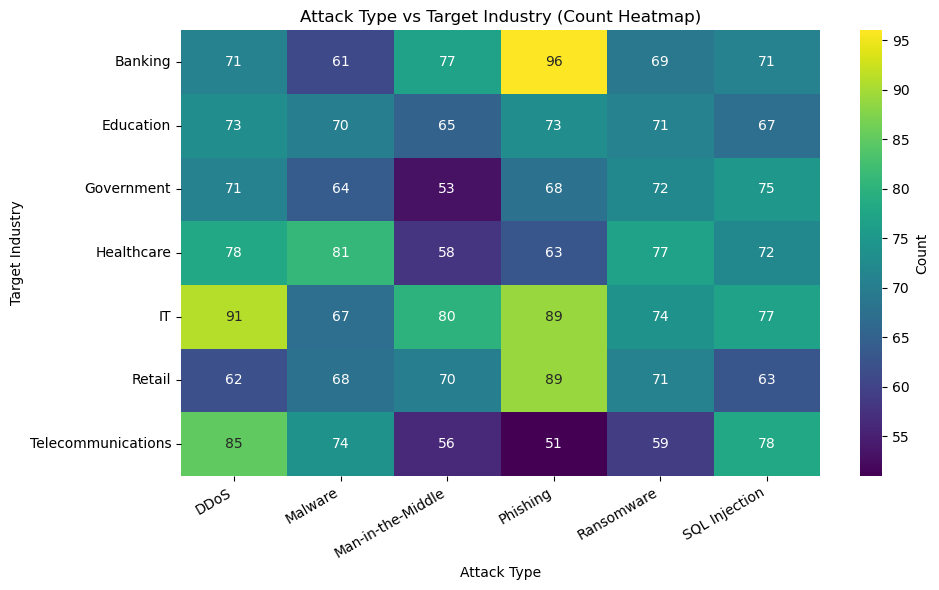

In [21]:
# heatmap using seaborn
pivot_counts = pd.crosstab(
    df_kaggle_data["Target Industry"],
    df_kaggle_data["Attack Type"]
)

plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_counts,
    cmap="viridis",
    annot=True,          # optional: show counts
    fmt="d",
    cbar_kws={"label": "Count"}
)

plt.title("Attack Type vs Target Industry (Count Heatmap)")
plt.xlabel("Attack Type")
plt.ylabel("Target Industry")
plt.xticks(rotation=30, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()